In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
PATH = 'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/1.4.11_experimentation_guided_example/experiment_data_final.csv'
experiment_data = pd.read_csv(PATH)

In [4]:
experiment_data.head(10)

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN
5,2016-04-01,0,0,NaN
6,2016-04-01,1,1,2016-04-02
7,2016-04-01,0,0,NaN
8,2016-04-01,0,0,NaN
9,2016-04-01,0,0,NaN


#### Using the information in the file, how large is each group?  Remember that the column 'test' is binary.  1 represents the Test Group, while 0 represents the Control Group

In [5]:
Test = len(experiment_data[experiment_data.test == 1])
Control = len(experiment_data[experiment_data.test == 0])
print('Test Group Size:',Test)
print('Control Group Size:',Control)

Test Group Size: 19861
Control Group Size: 46867


#### What is the sign up rate of the test and control?

In [6]:
pd.options.display.float_format = '{:.2f}%'.format
Test_Signup = experiment_data[experiment_data.test == 1].is_signed_up.mean()
Control_Signup = experiment_data[experiment_data.test == 0].is_signed_up.mean()
print('Test Group Sign-Up Rate:',"{:.2%}".format(Test_Signup))
print ('Control Group Sign-Up Rate:',"{:.2%}".format(Control_Signup))

Test Group Sign-Up Rate: 24.21%
Control Group Sign-Up Rate: 19.94%


In [7]:
pd.options.display.float_format = '{:.2f}%'.format
experiment_data.head()

,treatment_date,test,is_signed_up,signup_date
0,2016-04-01,0,0,NaN
1,2016-04-01,0,0,NaN
2,2016-04-01,0,0,NaN
3,2016-04-01,0,0,NaN
4,2016-04-01,0,0,NaN


#### Is the experiment already significant?

In [8]:
stats.ttest_ind(experiment_data[experiment_data.test == 1].is_signed_up,
                experiment_data[experiment_data.test == 0].is_signed_up)

Ttest_indResult(statistic=12.368130184147793, pvalue=4.248167714911685e-35)

#### The groups are significantly different.  Having the final data set allows us to see the full picture and the actual differences between the control and test groups


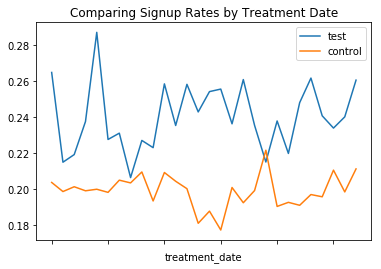

T-Test Results by Date
Ttest_indResult(statistic=2.109324797220635, pvalue=0.03503362670270496)
Ttest_indResult(statistic=0.6192500966292611, pvalue=0.5358074588708265)
Ttest_indResult(statistic=0.5679550900332947, pvalue=0.5701279663761336)
Ttest_indResult(statistic=1.6188051066317655, pvalue=0.1055969402778888)
Ttest_indResult(statistic=2.8685447266859416, pvalue=0.004164832495654052)
Ttest_indResult(statistic=0.96535203316303, pvalue=0.33447754270147856)
Ttest_indResult(statistic=1.0646969669150483, pvalue=0.2870993136921545)
Ttest_indResult(statistic=0.10372657556539404, pvalue=0.9173962881267106)
Ttest_indResult(statistic=0.7109875532022712, pvalue=0.4771475732556426)
Ttest_indResult(statistic=1.234910031428132, pvalue=0.2169634842483128)
Ttest_indResult(statistic=1.7524585316828551, pvalue=0.07982714269646307)
Ttest_indResult(statistic=1.0772576129054874, pvalue=0.2814883969553773)
Ttest_indResult(statistic=1.9956610823589083, pvalue=0.046093372990527584)
Ttest_indResult(statisti

In [10]:
fig = experiment_data[experiment_data.test==1][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot()
experiment_data[experiment_data.test==0][
    ['treatment_date', 'is_signed_up']].groupby('treatment_date').mean().plot(ax=fig)
plt.legend(['test','control'])
plt.title('Comparing Signup Rates by Treatment Date')
plt.show()

print('T-Test Results by Date')

for date in experiment_data.treatment_date.unique():
    dated_data = experiment_data[experiment_data.treatment_date == date]
    print(stats.ttest_ind(dated_data[dated_data.test == 1].is_signed_up,
                          dated_data[dated_data.test == 0].is_signed_up))